In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('archive/spam.csv', encoding='latin-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
544,ham,This girl does not stay in bed. This girl does...,NaN,NaN,NaN
3179,ham,There the size of elephant tablets & u shove u...,NaN,NaN,NaN
4269,ham,Great. Hope you are using your connections fro...,NaN,NaN,NaN
1475,ham,Nice. Wait...should you be texting right now? ...,NaN,NaN,NaN
2460,ham,i cant talk to you now.i will call when i can....,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2317,ham,Waqt se pehle or naseeb se zyada kisi ko kuch ...
2921,ham,I've not sent it. He can send me.
4301,ham,Aiyar hard 2 type. U later free then tell me t...
2280,ham,R Ì_ comin back for dinner?
5131,ham,That sucks. I'll go over so u can do my hair. ...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1465,spam,YOU 07801543489 are guaranteed the latests Nok...
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...
273,ham,"Usf I guess, might as well take 1 car"
1536,ham,How's it feel? Mr. Your not my real Valentine ...
1318,ham,Ok...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

## 2.EDA

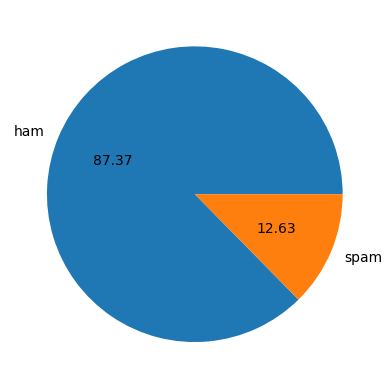

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

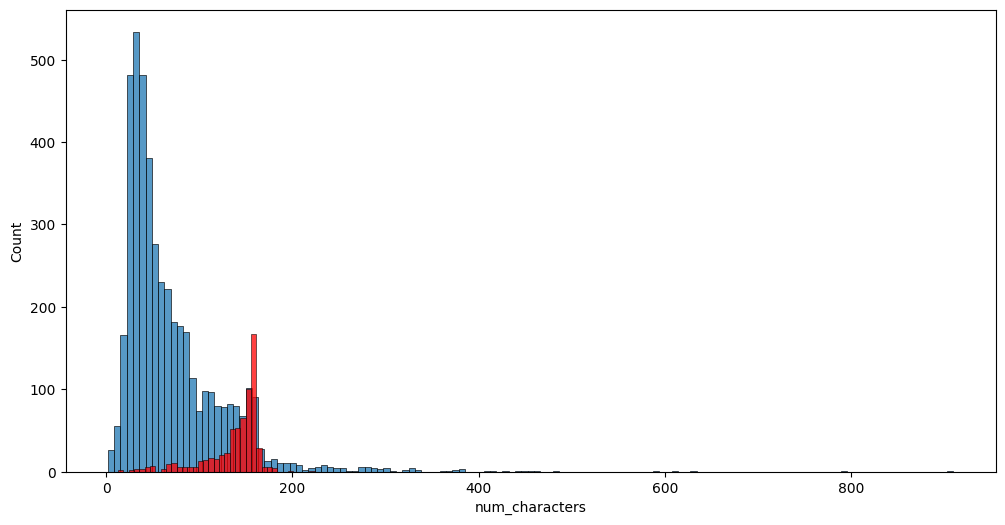

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

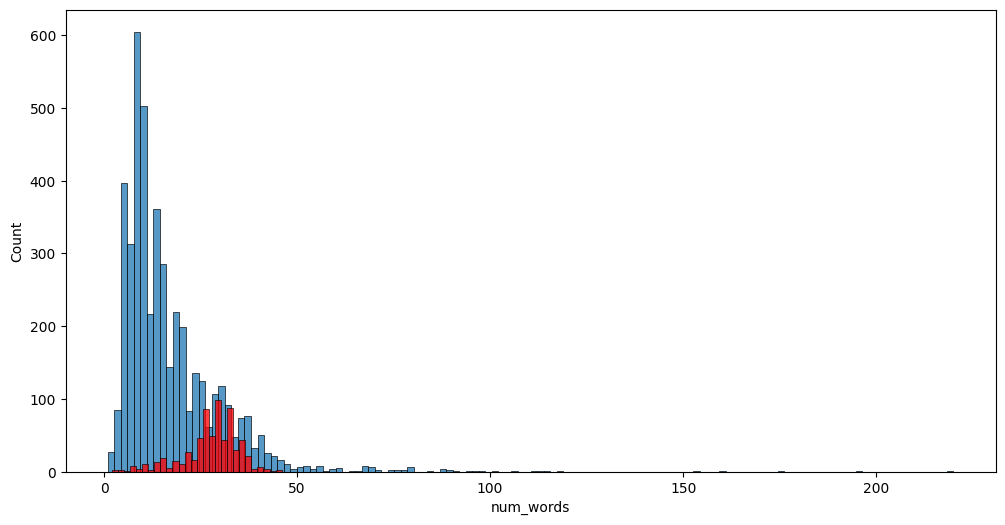

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [28]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # remove punctuation
    text = [word for word in text if word.isalnum()]

    # keep alpha numeric words
    text = [word for word in text if word.isalpha()]

    # remove stop words
    text = [word for word in text if word not in nltk.corpus.stopwords.words('english')]

    return " ".join(text)

In [29]:
text_transform("Hello, I am learning NLP. It is very interesting!")

'hello learning nlp interesting'

In [31]:
df['transformed_text'] = df['text'].apply(text_transform)

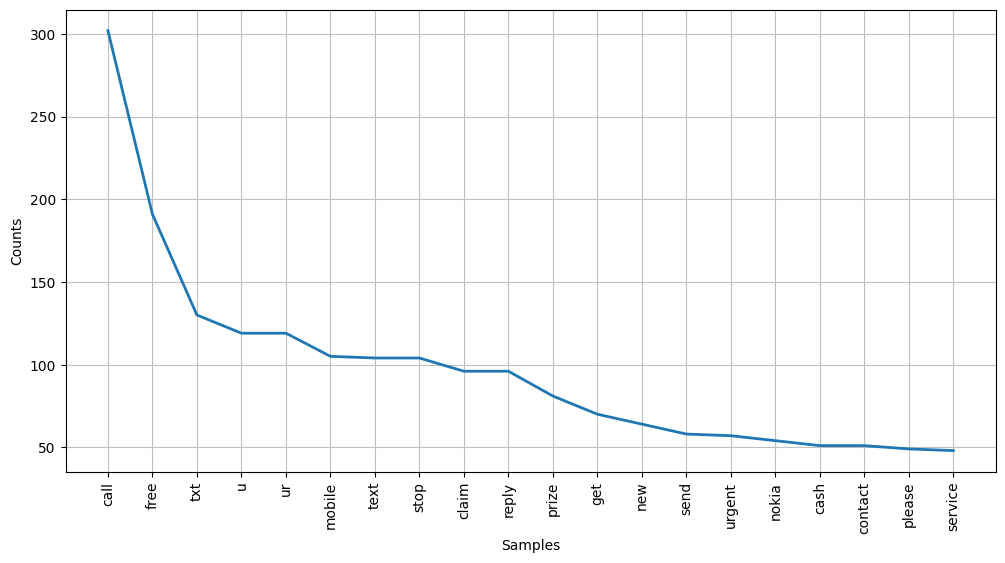

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
# all words that are in spam
spam_words = []
for text in df[df['target'] == 1]['transformed_text']:
    for word in text.split():
        spam_words.append(word)

# making a frequency distribution
spam_words = nltk.FreqDist(spam_words)

# plot the most common words
plt.figure(figsize=(12,6))
spam_words.plot(20)

## 4. Model Building

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [35]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [36]:
X.shape

(5169, 3000)

In [39]:
y = df['target'].values

y

array([0, 0, 1, ..., 0, 0, 0])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [45]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9758220502901354
[[889   0]
 [ 25 120]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.97      1034



In [46]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [47]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))